In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import tkinter as tk
from tkinter import filedialog
from scipy.integrate import quad

def leer_csv(archivo_csv):
    df = pd.read_csv(archivo_csv, delimiter=';')
    return df

In [2]:
def fondo_seccion_transversal(condicion_hidrologica):
    return round(condicion_hidrologica['cota cauce (m)'].min(), 2)

def profundidad_media(condicion_hidrologica):
    return round(condicion_hidrologica['cota cauce (m)'].mean(), 2)
    
def perimetro_mojado(condicion_hidrologica):
    return np.sqrt(np.diff(condicion_hidrologica['cota cauce (m)'])**2 + np.diff(condicion_hidrologica['abscisa (m)'])**2).sum()

def area_mojada(condicion_hidrologica):
    x = condicion_hidrologica['abscisa (m)']
    area, error = quad(lambda x: np.interp(x, condicion_hidrologica['abscisa (m)'], condicion_hidrologica['cota cauce (m)']), condicion_hidrologica['abscisa (m)'].min(), condicion_hidrologica['abscisa (m)'].max())
    return area
def analizar_cotas(condicion_hidrologica):
    max_cota = -float('inf')
    for index, row in condicion_hidrologica.iterrows():
        if row['cota agua']:
            if row['cota cauce (m)'] > max_cota:
                max_cota = row['cota cauce (m)']
    
    #100.11 es la cota de inundación 
    if max_cota > 100.11:
        print(f'Se ha producido una inundación.')
    else:
        print('No se ha producido una inundación.')
    borde_libre = max_cota - 100.11
    print(f'La maxima cota de agua fue de {max_cota} m.')
    print(f'El borde libre es de {borde_libre} m.')

In [3]:
def graficar_batimetria(archivo1, archivo2):
    condicion_hidrologica1 = leer_csv(archivo1)
    condicion_hidrologica2 = leer_csv(archivo2)
    
    fecha1 = archivo1.split('/')[-1].split('.')[0]
    fecha2 = archivo2.split('/')[-1].split('.')[0]

    """
    figure es una funcion propia de matplotlib que hace algo como "dibujar" o utiliza una grafica ya existente,
    aqui se crea la grafica y con el parametro figsize le doy un ancho y largo en inches
    """
    plt.figure(figsize=(10, 6))

    #condicion_hidrologica1 = condicion_hidrologica1[condicion_hidrologica1['cota agua (m)'] == 'True']
    #condicion_hidrologica2 = condicion_hidrologica2[condicion_hidrologica2['cota agua (m)'] == 'True']

    plt.scatter(x=condicion_hidrologica1['abscisa (m)'], y=condicion_hidrologica1['cota cauce (m)'], label=f'Topo-batimetría {fecha1}', color='blue')
    plt.plot(condicion_hidrologica1['abscisa (m)'], condicion_hidrologica1['cota cauce (m)'], color='blue')
    plt.scatter(x=condicion_hidrologica2['abscisa (m)'], y=condicion_hidrologica2['cota cauce (m)'], label=f'Topo-batimetría {fecha2}', color='green')
    plt.plot(condicion_hidrologica2['abscisa (m)'], condicion_hidrologica2['cota cauce (m)'], color='green')
    
    plt.title('Comparación de Sección Transversal del Río')
    plt.xlabel('Abscisa (m)')
    plt.ylabel('Cota (m)')
    plt.legend()
    plt.grid()

    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_label_position('top')
    
    print("Fondo de la sección transversal en la primera condición hidrólogica: ",fondo_seccion_transversal(condicion_hidrologica1), "(m)")
    print("Fondo de la seeción transversal en la segunda condición hidrológica: ",fondo_seccion_transversal(condicion_hidrologica2), "(m)")

    print("Profundidad media de la sección transversal en la primera condición hidrológica: ",profundidad_media(condicion_hidrologica1), "(m2)")
    print("Profundidad media de la sección transversal en la segunda condición hidrológica: ",profundidad_media(condicion_hidrologica2), "(m2)")

    print(f"Perímetro mojado en la primera condición hidrológica: {perimetro_mojado(condicion_hidrologica1)} (m)")
    print(f"Perímetro mojado en la segunda condición hidrológica: {perimetro_mojado(condicion_hidrologica2)} (m)")
    
    print(f"Área mojada en la primera condición hidrológica: {area_mojada(condicion_hidrologica1)} (m2)")
    print(f"Área mojada en la segunda condición hidrológica: {area_mojada(condicion_hidrologica2)} (m2)")

    print("Radio hidraulico de la primera condición hidrológica: ", area_mojada(condicion_hidrologica1)/perimetro_mojado(condicion_hidrologica1), "(m)")
    print("Radio hidraulico de la segunda condición hidrológica: ", area_mojada(condicion_hidrologica2)/perimetro_mojado(condicion_hidrologica2), "(m)")

    analizar_cotas(condicion_hidrologica1)
    analizar_cotas(condicion_hidrologica2)

    plt.show()

In [4]:
def seleccionar_archivo1(etiqueta_archivo1):
    global archivo1
    archivo1 = filedialog.askopenfilename(filetypes=[('CSV files', '*.csv')])
    etiqueta_archivo1.config(text=archivo1)
def seleccionar_archivo2(etiqueta_archivo2):
    global archivo2
    archivo2 = filedialog.askopenfilename(filetypes=[('CSV files', '*.csv')])
    etiqueta_archivo2.config(text=archivo2)

Fondo de la sección transversal en la primera condición hidrólogica:  91.1 (m)
Fondo de la seeción transversal en la segunda condición hidrológica:  92.19 (m)
Profundidad media de la sección transversal en la primera condición hidrológica:  94.74 (m2)
Profundidad media de la sección transversal en la segunda condición hidrológica:  96.64 (m2)
Perímetro mojado en la primera condición hidrológica: 353.19098446396504 (m)
Perímetro mojado en la segunda condición hidrológica: 333.8208601869308 (m)


/tmp/ipykernel_91075/3390815613.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  area, error = quad(lambda x: np.interp(x, condicion_hidrologica['abscisa (m)'], condicion_hidrologica['cota cauce (m)']), condicion_hidrologica['abscisa (m)'].min(), condicion_hidrologica['abscisa (m)'].max())


Área mojada en la primera condición hidrológica: 32846.26378666739 (m2)
Área mojada en la segunda condición hidrológica: 31585.28690841237 (m2)
Radio hidraulico de la primera condición hidrológica:  92.99859065348988 (m)
Radio hidraulico de la segunda condición hidrológica:  94.61747504552426 (m)


KeyError: 'cota agua'

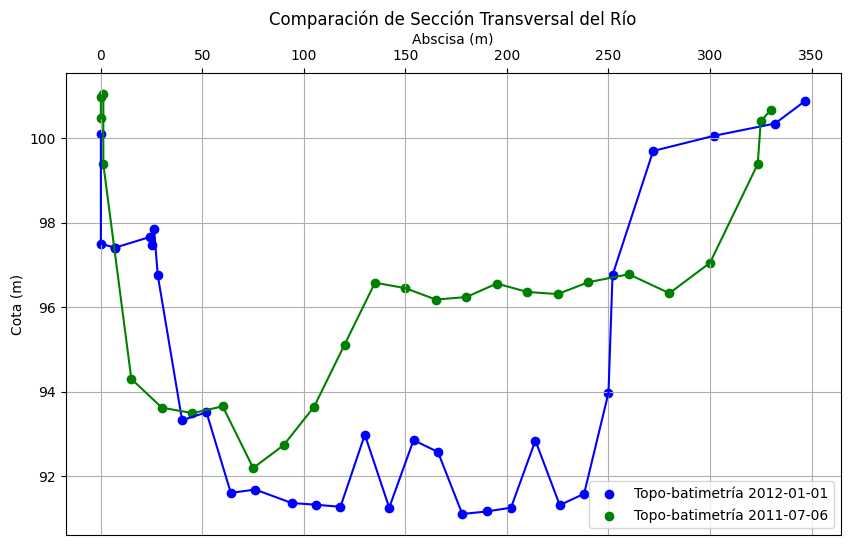

In [5]:
root = tk.Tk()
root.title("Seleccionador de archivos CSV")
root.geometry("400x200")

etiqueta_archivo1 = tk.Label(root, text="Seleccione el archivo CSV de la condición hidrológica 1")
etiqueta_archivo1.pack(pady=5)

boton_archivo1 = tk.Button(root, text="Seleccionar archivo", command=seleccionar_archivo1(etiqueta_archivo1))
boton_archivo1.pack(pady=5)

etiqueta_archivo2 = tk.Label(root, text="Seleccione el archivo CSV de la condición hidrológica 2")
etiqueta_archivo2.pack(pady=5)

boton_archivo2 = tk.Button(root, text="Seleccionar archivo", command=seleccionar_archivo2(etiqueta_archivo2))
boton_archivo2.pack(pady=5)

boton_graficar = tk.Button(root, text="Graficar", command=graficar_batimetria(archivo1, archivo2))
root.mainloop()